#Customer Churn Prediction on Bank Dataset

Churn is the term used to describe when a customer stops using a certain organisation’s services

# Phase 1

##Load the Dataset
- Check the dimensions

In [4]:
import numpy as np
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')
dataset = np.loadtxt('/content/drive/My Drive/project/Dataset.csv', delimiter=',',skiprows=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(dataset.shape)

(175028, 9)


## Preview first 5 rows

In [ ]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(dataset[0:5, :])

[[668.00 33.00 3.00 0.00 2.00 1.00 0.00 181449.97 0.00]
 [627.00 33.00 1.00 0.00 2.00 1.00 1.00 49503.50 0.00]
 [678.00 40.00 10.00 0.00 2.00 1.00 0.00 184866.69 0.00]
 [581.00 34.00 2.00 148882.54 1.00 1.00 1.00 84560.88 0.00]
 [716.00 33.00 5.00 0.00 2.00 1.00 1.00 15068.83 0.00]]


## Check for missing values

In [ ]:
print("\nMissing values")
missing_values = np.isnan(dataset).sum()
print(f"Total missing values: {missing_values}")


Missing values
Total missing values: 0


## Distribution & Visualization of each input feature

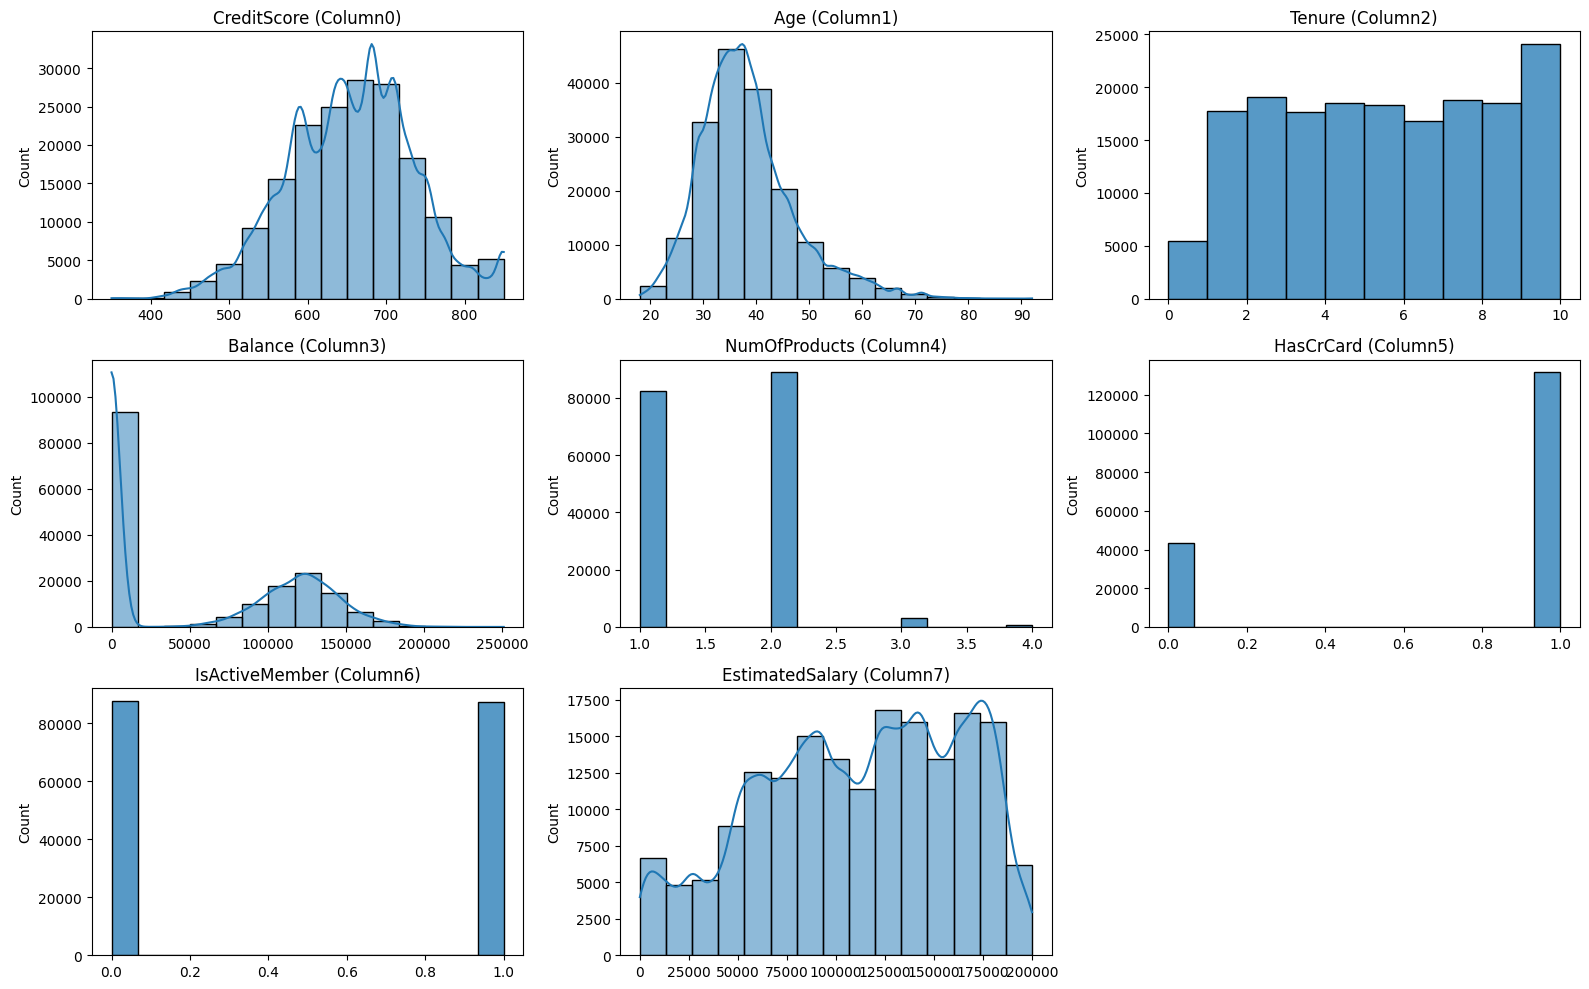

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure for subplots
plt.figure(figsize=(16, 10))

# creditscore
plt.subplot(3, 3, 1)
sns.histplot(dataset[:, 0], bins=15, kde=True)
plt.title('CreditScore (Column0)')

# age
plt.subplot(3, 3, 2)
sns.histplot(dataset[:, 1], bins=15, kde=True)
plt.title('Age (Column1)')

# Plotting 'Tenure'
plt.subplot(3, 3, 3)
sns.histplot(dataset[:, 2], bins=10)
plt.title('Tenure (Column2)')

# Plotting 'Balance'
plt.subplot(3, 3, 4)
sns.histplot(dataset[:, 3], bins=15, kde=True)
plt.title('Balance (Column3)')

# Plotting 'NumOfProducts'
plt.subplot(3, 3, 5)
sns.histplot(dataset[:, 4],bins=15)
plt.title('NumOfProducts (Column4)')

# Plotting 'HasCrCard'
plt.subplot(3, 3, 6)
sns.histplot(dataset[:, 5], bins=15)
plt.title('HasCrCard (Column5)')

# Plotting 'IsActiveMember'
plt.subplot(3, 3, 7)
sns.histplot(dataset[:, 6], bins=15)
plt.title('IsActiveMember (Column6)')

# Plotting 'EstimatedSalary'
plt.subplot(3, 3, 8)
sns.histplot(dataset[:, 7], bins=15, kde=True)
plt.title('EstimatedSalary (Column7)')

plt.tight_layout()
plt.show()


## Range of input features

In [6]:
import pandas as pd

# Column names
input_column_names = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                      'IsActiveMember', 'EstimatedSalary']

# all columns except the columm 'Exited')
input_features = dataset[:, :-1]

min_values = np.min(input_features, axis=0)
max_values = np.max(input_features, axis=0)
mean_values = np.mean(input_features, axis=0)
std_values = np.std(input_features, axis=0)

statistics = np.vstack((min_values, max_values, mean_values, std_values)).T

statistics_df = pd.DataFrame(statistics, index=input_column_names, columns=['Min', 'Max', 'Mean', 'Std'])

# Display the resulting statistics table
print(statistics_df)


                    Min        Max           Mean           Std
CreditScore      350.00     850.00     656.113068     81.148041
Age               18.00      92.00      38.171337      8.969539
Tenure             0.00      10.00       5.019968      2.811147
Balance            0.00  250898.09   56676.772103  62982.238604
NumOfProducts      1.00       4.00       1.553072      0.549210
HasCrCard          0.00       1.00       0.751183      0.432328
IsActiveMember     0.00       1.00       0.498754      0.499998
EstimatedSalary   11.58  199992.48  111863.295024  50814.973265


## Output Data Visualization

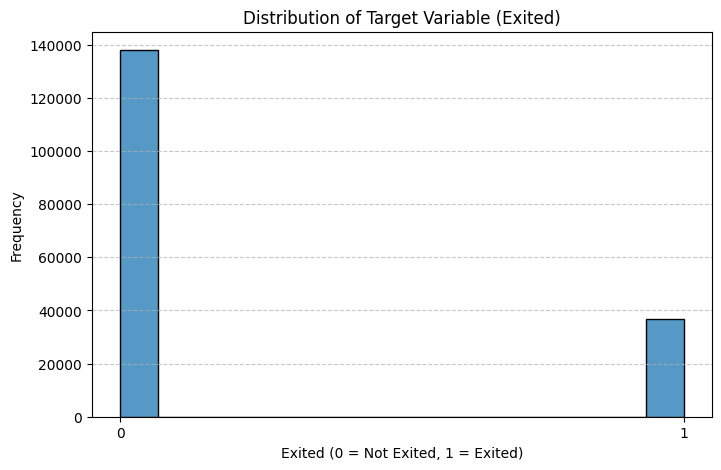

In [ ]:
output_values = dataset[:, -1]

# Create a bar plot to visualize the distribution of the output variable
plt.figure(figsize=(8, 5))
sns.histplot(output_values, bins=15, kde=False)
plt.title('Distribution of Target Variable (Exited)')
plt.xlabel('Exited (0 = Not Exited, 1 = Exited)')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Setting ticks to represent binary categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Baseline Accuracy

In [ ]:
# Calculate the total number of records
total_records = len(output_values)

# number of customers who did not churn (value = 0)
non_churn_count = np.sum(output_values == 0)

# Calculate baseline accuracy as the proportion of non-churned customers
baseline_accuracy = non_churn_count / total_records * 100

print(f"Baseline Accuracy: {baseline_accuracy:.2f}%")


Baseline Accuracy: 78.89%


# Phase 2

## Normalize dataset before trying to overfit
- ML models work better when data is normalised

In [ ]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary']
numerical_indices = [input_column_names.index(col) for col in numerical_columns]

mean = np.mean(dataset[:, numerical_indices], axis=0)
std = np.std(dataset[:, numerical_indices], axis=0)

dataset[:, numerical_indices] = (dataset[:, numerical_indices] - mean) / std

In [ ]:
print("\nFirst 5 rows of dataset after normalization:")
print(dataset[:5])


First 5 rows of dataset after normalization:
[[ 0.14648453 -0.57654436 -0.71855657 -0.89988501  0.81376582  1.
   0.          1.3694128   0.        ]
 [-0.35876489 -0.57654436 -1.4300099  -0.89988501  0.81376582  1.
   1.         -1.22719331  0.        ]
 [ 0.26971609  0.20387478  1.7715301  -0.89988501  0.81376582  1.
   0.          1.43665125  0.        ]
 [-0.92563008 -0.46505591 -1.07428323  1.46399636 -1.00703065  1.
   1.         -0.53729075  0.        ]
 [ 0.73799603 -0.57654436 -0.00710323 -0.89988501  0.81376582  1.
   1.         -1.9048414   0.        ]]


In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]

## Logistic Regression Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=128, batch_size=512)

Epoch 1/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8208 - loss: 0.4172
Epoch 2/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8220 - loss: 0.4158
Epoch 3/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4180
Epoch 4/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 0.4166
Epoch 5/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.4182
Epoch 6/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8215 - loss: 0.4164
Epoch 7/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8226 - loss: 0.4152
Epoch 8/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8212 - loss: 0.4175
Epoch 9/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8222 - loss: 0.4142
Epoch 10/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8204 - loss: 0.4173
Epoch 11/128
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.4185
Epoch 12/128
342/342 ━━━━━━━━━━━━━━━━━━━━

# 6-32-16-8-4-2 Architecture


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_and_fit_model(layer_sizes, input_dim, batchsize=100, num_of_epochs=256):
    model = Sequential()
    model.add(Dense(layer_sizes[0], input_dim=input_dim, activation='relu'))
    for size in layer_sizes[1:]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
    history = model.fit(X, Y, epochs=num_of_epochs, batch_size=batchsize, callbacks=[early_stopping])
    return history, model

In [ ]:
input_dim = len(X[0, :])
layer_sizes = [64, 32, 16, 8,4,2]

history1, model1 = create_and_fit_model(layer_sizes, input_dim, 100)

Epoch 1/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8103 - loss: 0.5827
Epoch 2/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8536 - loss: 0.3941
Epoch 3/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8543 - loss: 0.3588
Epoch 4/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8534 - loss: 0.3501
Epoch 5/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8553 - loss: 0.3421
Epoch 6/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8540 - loss: 0.3426
Epoch 7/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8542 - loss: 0.3432
Epoch 8/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8549 - loss: 0.3417
Epoch 9/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8555 - loss: 0.3398
Epoch 10/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8540 - loss: 0.3405
Epoch 11/256
1751/1751 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8555 - loss: 0.3385
Epoch 12/256
1751/

In [ ]:
input_dim = len(X[0, :])
layer_sizes = [128, 64, 32, 16, 8,4,2]

history2, model2 = create_and_fit_model(layer_sizes, input_dim, 256)

Epoch 1/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8193 - loss: 0.4094
Epoch 2/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8533 - loss: 0.3551
Epoch 3/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8533 - loss: 0.3489
Epoch 4/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8552 - loss: 0.3459
Epoch 5/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8537 - loss: 0.3465
Epoch 6/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8546 - loss: 0.3431
Epoch 7/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8543 - loss: 0.3421
Epoch 8/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8545 - loss: 0.3423
Epoch 9/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8552 - loss: 0.3403
Epoch 10/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8565 - loss: 0.3401
Epoch 11/256
684/684 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8560 - loss: 0.3394
Epoch 12/256
684/684 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
input_dim = len(X[0, :])
layer_sizes = [256, 128, 64, 32, 16, 8,4,2]

history2, model3 = create_and_fit_model(layer_sizes, input_dim, 100)

In [ ]:
input_dim = len(X[0, :])
layer_sizes = [64, 32, 16, 8,4,2]

history1, model1 = create_and_fit_model(layer_sizes, input_dim, 100)

# Phase 3

###Shuffle dataset

In [7]:
import random
np.random.shuffle(dataset)
print(dataset[:5])

[[5.9000000e+02 4.2000000e+01 8.0000000e+00 1.2319252e+05 1.0000000e+00
  1.0000000e+00 0.0000000e+00 5.0774810e+04 1.0000000e+00]
 [6.7800000e+02 4.3000000e+01 1.0000000e+01 1.1398021e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6803490e+05 1.0000000e+00]
 [6.3500000e+02 2.9000000e+01 9.0000000e+00 1.6256032e+05 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0715540e+05 0.0000000e+00]
 [6.9100000e+02 4.6000000e+01 2.0000000e+00 0.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0490268e+05 0.0000000e+00]
 [6.3400000e+02 5.9000000e+01 3.0000000e+00 9.5727050e+04 1.0000000e+00
  0.0000000e+00 0.0000000e+00 9.7939400e+04 1.0000000e+00]]


### Split data into Training/Validation Set

In [8]:
index_20percent = int(0.2 * len(dataset[:, 0]))
print(index_20percent)

35005


- 35005 rows will goes as validation set and the remaining goes to the training

In [9]:
XVALIDATION = dataset[:index_20percent, :-1]
YVALIDATION = dataset[:index_20percent, -1]

XTRAIN = dataset[index_20percent:, 0:-1]
YTRAIN = dataset[index_20percent:, -1]

In [10]:
print("\nShapes after splitting:")
print("XTRAIN shape:", XTRAIN.shape)
print("YTRAIN shape:", YTRAIN.shape)
print("XVALIDATION shape:", XVALIDATION.shape)
print("YVALIDATION shape:", YVALIDATION.shape)


Shapes after splitting:
XTRAIN shape: (140023, 8)
YTRAIN shape: (140023,)
XVALIDATION shape: (35005, 8)
YVALIDATION shape: (35005,)


- Review the dimensions of training & validation set

In [11]:
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

(140023, 8)
(140023,)
(35005, 8)
(35005,)
[[5.4100000e+02 3.2000000e+01 4.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.0000000e+00 1.1495142e+05]
 [6.2700000e+02 4.6000000e+01 4.0000000e+00 1.5281256e+05 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.3981580e+04]
 [6.0200000e+02 3.9000000e+01 2.0000000e+00 0.0000000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 1.4290344e+05]]
[0. 1. 0.]
[[5.9000000e+02 4.2000000e+01 8.0000000e+00 1.2319252e+05 1.0000000e+00
  1.0000000e+00 0.0000000e+00 5.0774810e+04]
 [6.7800000e+02 4.3000000e+01 1.0000000e+01 1.1398021e+05 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.6803490e+05]
 [6.3500000e+02 2.9000000e+01 9.0000000e+00 1.6256032e+05 1.0000000e+00
  1.0000000e+00 0.0000000e+00 1.0715540e+05]]
[1. 1. 0.]


###Data distribution for training and validation

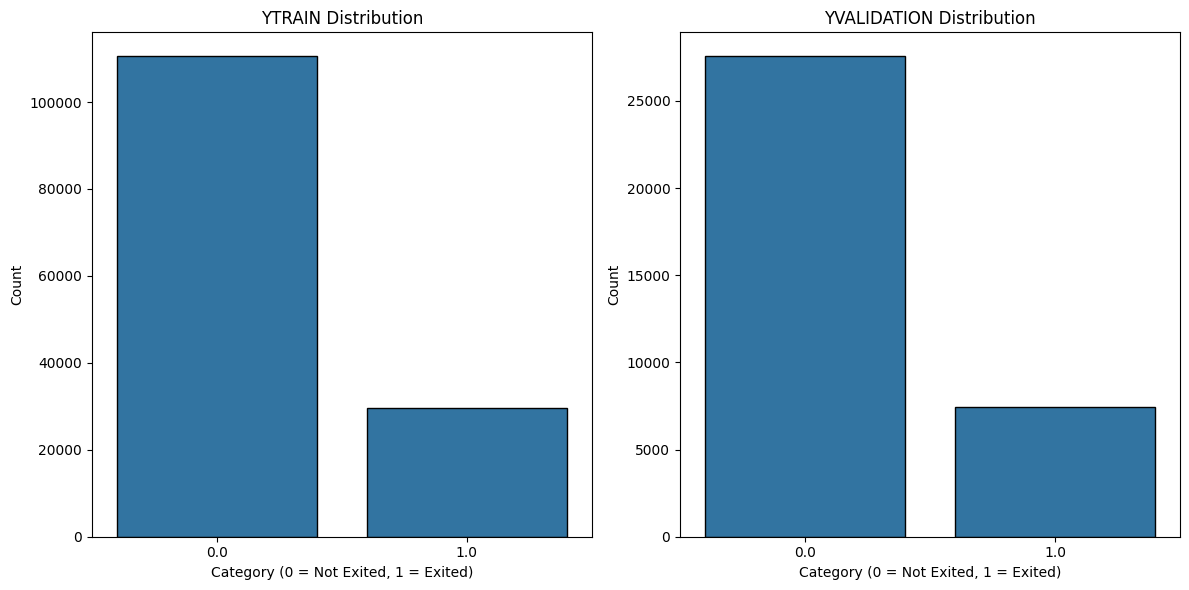

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a figure to visualize the split
plt.figure(figsize=(12, 6))

# Plot YTRAIN distribution
plt.subplot(1, 2, 1)
sns.countplot(x=YTRAIN, edgecolor='black')
plt.title('YTRAIN Distribution')
plt.xlabel('Category (0 = Not Exited, 1 = Exited)')
plt.ylabel('Count')
plt.xticks([0, 1])

# Plot YVALIDATION distribution
plt.subplot(1, 2, 2)
sns.countplot(x=YVALIDATION, edgecolor='black')
plt.title('YVALIDATION Distribution')
plt.xlabel('Category (0 = Not Exited, 1 = Exited)')
plt.ylabel('Count')
plt.xticks([0, 1])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


###Normalization of training and validation datasets

In [13]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                     'EstimatedSalary']
numerical_indices = [input_column_names.index(col) for col in numerical_columns]

mean = np.mean(dataset[:, numerical_indices], axis=0)
std = np.std(dataset[:, numerical_indices], axis=0)

- Validation set is normalized using the same statistics from the training set.

In [14]:
XTRAIN[:, numerical_indices] = (XTRAIN[:, numerical_indices] - mean) / std
print("\nFirst 5 rows of XTRAIN after normalization:")
print(XTRAIN[:5])


First 5 rows of XTRAIN after normalization:
[[-1.41855633 -0.68803281 -0.3628299  -0.89988501 -1.00703065  0.
   1.          0.06077195]
 [-0.35876489  0.87280547 -0.3628299   1.52639522 -1.00703065  1.
   1.         -1.33586049]
 [-0.66684379  0.09238633 -1.07428323 -0.89988501  0.81376582  1.
   1.          0.61084643]
 [-0.95027639  1.43024771 -1.07428323  0.6453943  -1.00703065  1.
   1.          0.39191765]
 [-1.88683628 -0.13059057  1.06007677 -0.89988501  0.81376582  1.
   1.         -0.27491848]]


- Apply the same normalization to the numerical features in XVALIDATION using the mean and std from XTRAIN.

In [15]:
XVALIDATION[:, numerical_indices] = (XVALIDATION[:, numerical_indices] - mean) / std

print("\nFirst 5 rows of XVALIDATION after normalization:")
print(XVALIDATION[:5])


First 5 rows of XVALIDATION after normalization:
[[-0.81472167  0.42685167  1.06007677  1.05610327 -1.00703065  1.
   0.         -1.20217489]
 [ 0.26971609  0.53834012  1.7715301   0.90983489 -1.00703065  0.
   0.          1.10541444]
 [-0.26017963 -1.02249816  1.41580343  1.6811652  -1.00703065  1.
   0.         -0.09264779]
 [ 0.42991712  0.87280547 -1.07428323 -0.89988501  0.81376582  1.
   1.         -0.13697961]
 [-0.27250279  2.3221553  -0.71855657  0.62002048 -1.00703065  0.
   0.         -0.27401166]]


# LOGISTIC REGRESSION MODEL

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=256, batch_size=100, callbacks = [callback_a, callback_b])

Epoch 1/256
1368/1401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7487 - loss: 0.5191
Epoch 1: val_loss improved from inf to 0.42020, saving model to my_best_model.weights.h5
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7497 - loss: 0.5177 - val_accuracy: 0.8209 - val_loss: 0.4202
Epoch 2/256
1394/1401 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8209 - loss: 0.4176
Epoch 2: val_loss improved from 0.42020 to 0.41847, saving model to my_best_model.weights.h5
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8209 - loss: 0.4176 - val_accuracy: 0.8218 - val_loss: 0.4185
Epoch 3/256
1376/1401 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8211 - loss: 0.4156
Epoch 3: val_loss improved from 0.41847 to 0.41811, saving model to my_best_model.weights.h5
1401/1401 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8211 - loss: 0.4157 - val_accuracy: 0.8215 - val_loss: 0.4181
Epoch 4/256
1363/1401 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4156
Epoch 4: val

In [ ]:
print(history.params)

{'verbose': 'auto', 'epochs': 256, 'steps': 1401}


- Evaluate the model on the training data
- Using the same dataset that is used for training

In [ ]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores [1]*100))

4376/4376 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8210 - loss: 0.4153
['loss', 'compile_metrics']
[0.41675639152526855, 0.8211365342140198]

compile_metrics: 82.11%


- Evaluate model on Validation Dataset (Logistic Regression Model)

In [ ]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8228 - loss: 0.4136

compile_metrics: 82.14%


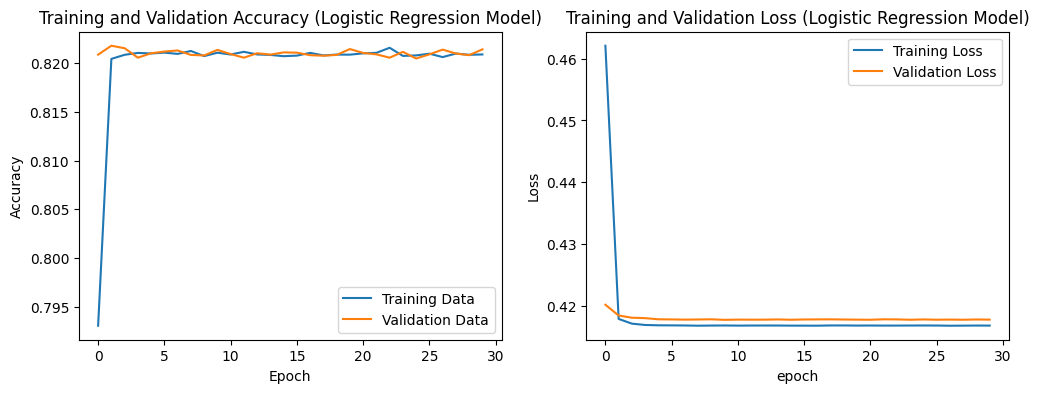

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.title('Training and Validation Accuracy (Logistic Regression Model)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.title('Training and Validation Loss (Logistic Regression Model)')
plt.show()

- Check how good the Logistic Regression model is

In [ ]:
print(YVALIDATION[:10])

[0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]


In [ ]:
prediction = model.predict(XVALIDATION)

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
print(prediction[0:10].T)

[[0.06 0.80 0.23 0.09 0.08 0.10 0.03 0.04 0.02 0.09]]


In [ ]:
print(prediction[0:10].round().T)

[[0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]


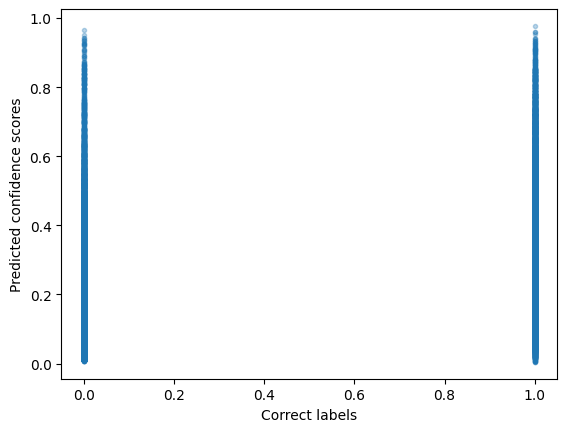

In [ ]:
plt.plot(YVALIDATION, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

- We can further evaluate the model using precision, recall, and F1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(YVALIDATION, prediction.round())
precision = precision_score(YVALIDATION, prediction.round())
recall = recall_score(YVALIDATION, prediction.round())
f1score = f1_score(YVALIDATION, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))



Accuracy: 82.76%
Precision: 68.30%
Recall: 37.56%
F1-score: 0.48


#BUILD A MODEL :- NEURAL NETWORK

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.callbacks import EarlyStopping, ModelCheckpoint
def train_and_fit_model(layer_sizes, input_dim, batchsize=100, num_of_epochs=256):
    model_name = '_'.join(map(str, layer_sizes))
    model = Sequential()
    model.add(Dense(layer_sizes[0], input_dim=input_dim, activation='relu'))
    for size in layer_sizes[1:]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True, verbose = 1)
    model_checkpoint = ModelCheckpoint(filepath = f'my_best_{model_name}.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)

    history = model.fit(XTRAIN, YTRAIN, validation_data=(XVALIDATION, YVALIDATION), epochs=num_of_epochs, batch_size=batchsize, callbacks=[early_stopping, model_checkpoint], verbose=1)
    model.load_weights(f'my_best_{model_name}.weights.h5')
    # print training loss and validation loss
    print(f"Training loss: {history.history['loss'][-1]}")
    print(f"Validation loss: {history.history['val_loss'][-1]}")
    accuracy_metrics(model, XVALIDATION, YVALIDATION)
    plot_accuracy_loss(history, model_name)

    return history, model

def accuracy_metrics(model, XVALIDATION, YVALIDATION):
    scores = model.evaluate(XVALIDATION, YVALIDATION)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    prediction = (model.predict(XVALIDATION))

    accuracy = accuracy_score(YVALIDATION, prediction.round())
    precision = precision_score(YVALIDATION, prediction.round())
    recall = recall_score(YVALIDATION, prediction.round())
    f1score = f1_score(YVALIDATION, prediction.round())
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print("Precision: %.2f%%" % (precision * 100.0))
    print("Recall: %.2f%%" % (recall * 100.0))
    print("F1-score: %.2f" % (f1score))

def plot_accuracy_loss(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['training data', 'validation data'], loc='lower right')
    plt.title(f'Training and Validation Accuracy ({model_name})')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.title(f'Training and Validation Loss({model_name})')
    plt.legend(['training Loss', 'validation Loss'], loc='upper right')
    plt.show()

#2-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1082/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7091 - loss: 0.5908
Epoch 1: val_loss improved from inf to 0.41656, saving model to my_best_2.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7099 - loss: 0.5897 - val_accuracy: 0.8198 - val_loss: 0.4166
Epoch 2/256
1073/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4112
Epoch 2: val_loss improved from 0.41656 to 0.39473, saving model to my_best_2.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8225 - loss: 0.4111 - val_accuracy: 0.8302 - val_loss: 0.3947
Epoch 3/256
1092/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8317 - loss: 0.3911
Epoch 3: val_loss improved from 0.39473 to 0.38275, saving model to my_best_2.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8317 - loss: 0.3911 - val_accuracy: 0.8316 - val_loss: 0.3827
Epoch 4/256
1084/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.3832
Epoch 4: val_loss i

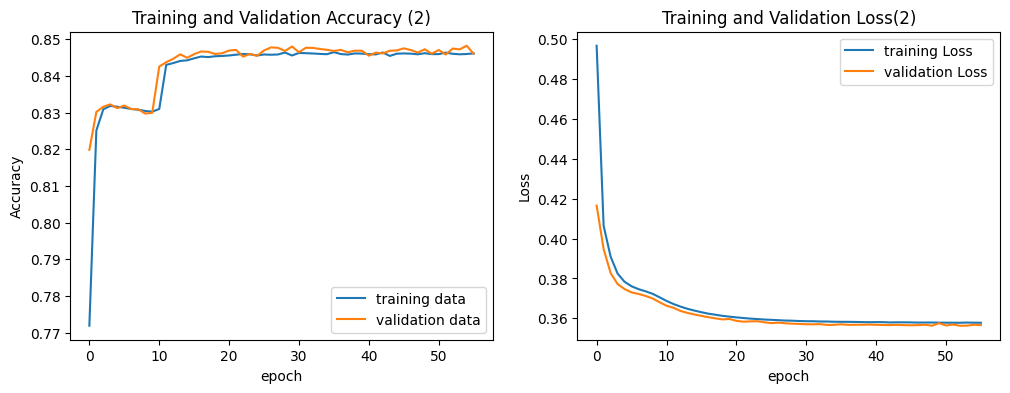

(<keras.src.callbacks.history.History at 0x79ccc8b74340>,
 <Sequential name=sequential, built=True>)

In [18]:
train_and_fit_model([2], len(XTRAIN[0, :]), 128, 256)

#4-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1087/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6868 - loss: 0.5871
Epoch 1: val_loss improved from inf to 0.38319, saving model to my_best_4.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6875 - loss: 0.5863 - val_accuracy: 0.8340 - val_loss: 0.3832
Epoch 2/256
1090/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.3771
Epoch 2: val_loss improved from 0.38319 to 0.36082, saving model to my_best_4.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8365 - loss: 0.3770 - val_accuracy: 0.8451 - val_loss: 0.3608
Epoch 3/256
1073/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.3605
Epoch 3: val_loss improved from 0.36082 to 0.35336, saving model to my_best_4.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8447 - loss: 0.3604 - val_accuracy: 0.8482 - val_loss: 0.3534
Epoch 4/256
1083/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3523
Epoch 4: val_loss i

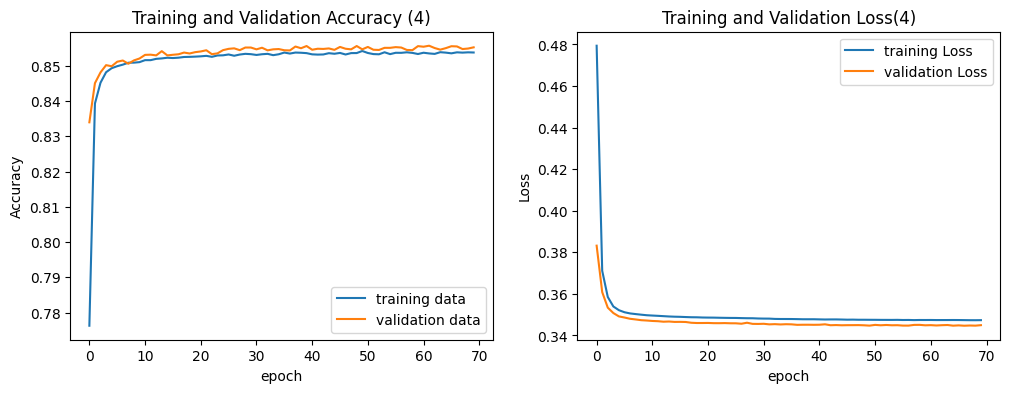

(<keras.src.callbacks.history.History at 0x79ccb4cbf010>,
 <Sequential name=sequential_1, built=True>)

In [19]:
train_and_fit_model([4], len(XTRAIN[0, :]), 128, 256)

#8-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6483 - loss: 0.6163
Epoch 1: val_loss improved from inf to 0.39760, saving model to my_best_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6484 - loss: 0.6161 - val_accuracy: 0.8241 - val_loss: 0.3976
Epoch 2/256
1063/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.3896
Epoch 2: val_loss improved from 0.39760 to 0.36521, saving model to my_best_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8284 - loss: 0.3894 - val_accuracy: 0.8407 - val_loss: 0.3652
Epoch 3/256
1076/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.3643
Epoch 3: val_loss improved from 0.36521 to 0.35399, saving model to my_best_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8428 - loss: 0.3643 - val_accuracy: 0.8468 - val_loss: 0.3540
Epoch 4/256
1091/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3574
Epoch 4: val_loss i

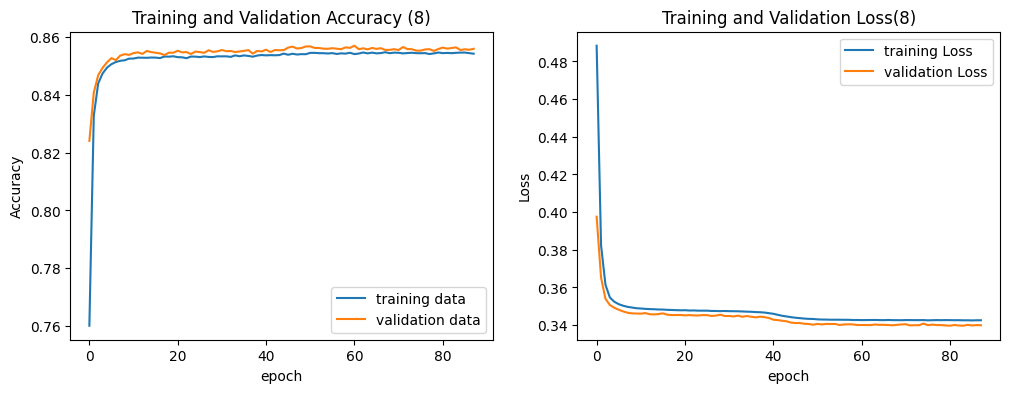

(<keras.src.callbacks.history.History at 0x79ccc8a7c460>,
 <Sequential name=sequential_3, built=True>)

In [21]:
train_and_fit_model([8], len(XTRAIN[0, :]), 128, 256)

#16-8-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1072/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7744 - loss: 0.4619
Epoch 1: val_loss improved from inf to 0.35127, saving model to my_best_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7754 - loss: 0.4606 - val_accuracy: 0.8495 - val_loss: 0.3513
Epoch 2/256
1068/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3520
Epoch 2: val_loss improved from 0.35127 to 0.34526, saving model to my_best_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 0.3520 - val_accuracy: 0.8527 - val_loss: 0.3453
Epoch 3/256
1084/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3469
Epoch 3: val_loss improved from 0.34526 to 0.34439, saving model to my_best_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8520 - loss: 0.3469 - val_accuracy: 0.8543 - val_loss: 0.3444
Epoch 4/256
1076/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3460
Epoch 4: v

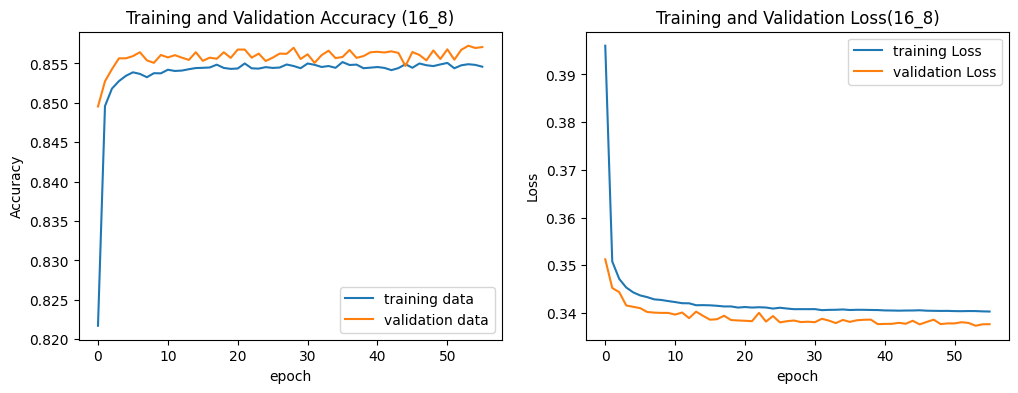

(<keras.src.callbacks.history.History at 0x79ccc507ff40>,
 <Sequential name=sequential_4, built=True>)

In [22]:
train_and_fit_model([16, 8], len(XTRAIN[0, :]), 128, 256)

#32-16-8-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1076/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.4563
Epoch 1: val_loss improved from inf to 0.34567, saving model to my_best_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7756 - loss: 0.4551 - val_accuracy: 0.8525 - val_loss: 0.3457
Epoch 2/256
1085/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8504 - loss: 0.3496
Epoch 2: val_loss improved from 0.34567 to 0.34335, saving model to my_best_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8504 - loss: 0.3496 - val_accuracy: 0.8545 - val_loss: 0.3434
Epoch 3/256
1086/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8515 - loss: 0.3457
Epoch 3: val_loss improved from 0.34335 to 0.34033, saving model to my_best_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8515 - loss: 0.3456 - val_accuracy: 0.8547 - val_loss: 0.3403
Epoch 4/256
1075/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 0.3434
E

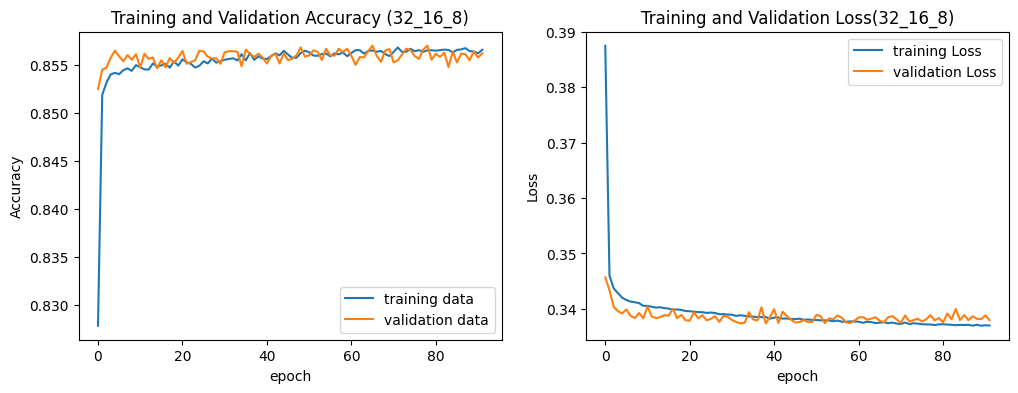

(<keras.src.callbacks.history.History at 0x79ccc4a5b670>,
 <Sequential name=sequential_5, built=True>)

In [23]:
train_and_fit_model([32,16,8], len(XTRAIN[0, :]), 128, 256)

#64-32-16-8-1 MODEL

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/256
1089/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8230 - loss: 0.4005
Epoch 1: val_loss improved from inf to 0.34105, saving model to my_best_64_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8231 - loss: 0.4003 - val_accuracy: 0.8534 - val_loss: 0.3410
Epoch 2/256
1084/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8533 - loss: 0.3431
Epoch 2: val_loss improved from 0.34105 to 0.34047, saving model to my_best_64_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8533 - loss: 0.3431 - val_accuracy: 0.8542 - val_loss: 0.3405
Epoch 3/256
1093/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8541 - loss: 0.3404
Epoch 3: val_loss improved from 0.34047 to 0.33924, saving model to my_best_64_32_16_8.weights.h5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8541 - loss: 0.3404 - val_accuracy: 0.8549 - val_loss: 0.3392
Epoch 4/256
1093/1094 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss:

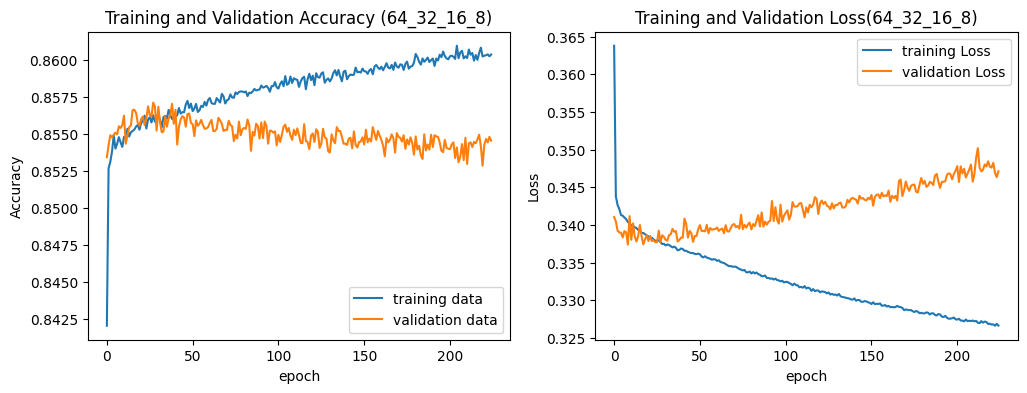

(<keras.src.callbacks.history.History at 0x79ccb574b4f0>,
 <Sequential name=sequential_6, built=True>)

In [24]:
train_and_fit_model([64,32,16,8], len(XTRAIN[0, :]), 128, 256)

Evaluating Logistic Regression Model...
Training Accuracy: 0.82
Validation Accuracy: 0.82
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix for Logistic Regression Model:
[[26000  1451]
 [ 3606  3948]]
Accuracy: 0.86
Precision: 0.73
Recall: 0.52
F1-score: 0.61



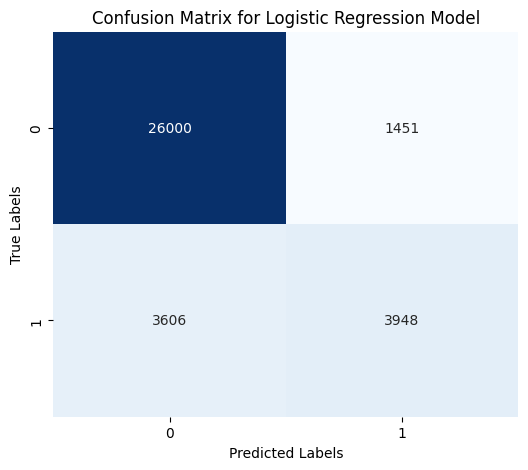

Evaluating Neural Network Model (2-1)...
Training Accuracy: 0.83
Validation Accuracy: 0.83
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix for Neural Network Model (2-1):
[[26134  1317]
 [ 4717  2837]]
Accuracy: 0.83
Precision: 0.68
Recall: 0.38
F1-score: 0.48



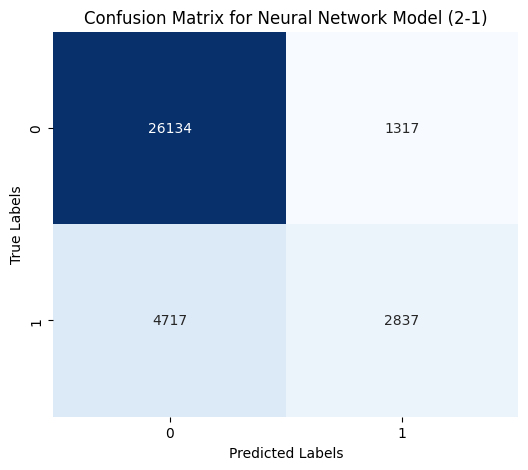

Evaluating Neural Network Model (4-1)...
Training Accuracy: 0.85
Validation Accuracy: 0.85
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix for Neural Network Model (4-1):
[[26358  1093]
 [ 4031  3523]]
Accuracy: 0.85
Precision: 0.76
Recall: 0.47
F1-score: 0.58



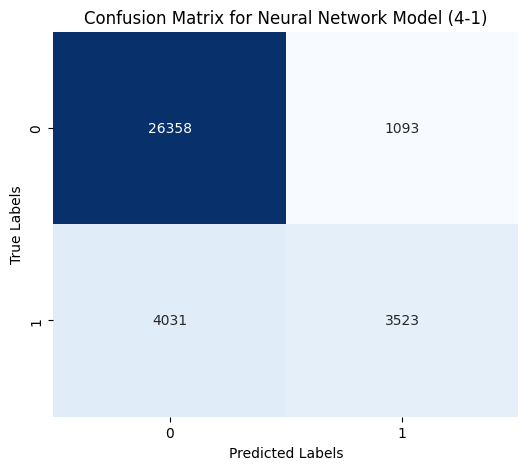

Evaluating Neural Network Model (8-1)...
Training Accuracy: 0.85
Validation Accuracy: 0.86
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix for Neural Network Model (8-1):
[[26180  1271]
 [ 3780  3774]]
Accuracy: 0.86
Precision: 0.75
Recall: 0.50
F1-score: 0.60



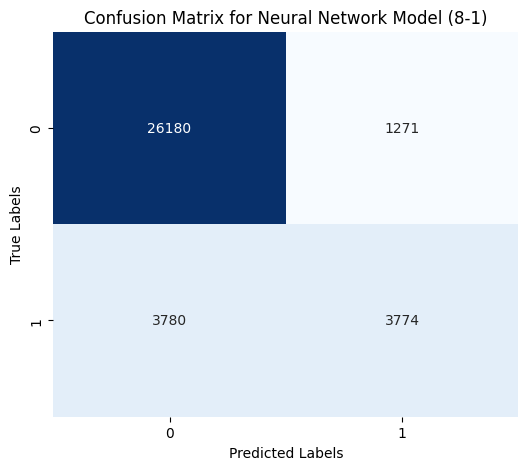

Evaluating Neural Network Model (16-8-1)...
Training Accuracy: 0.86
Validation Accuracy: 0.86
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix for Neural Network Model (16-8-1):
[[26094  1357]
 [ 3699  3855]]
Accuracy: 0.86
Precision: 0.74
Recall: 0.51
F1-score: 0.60



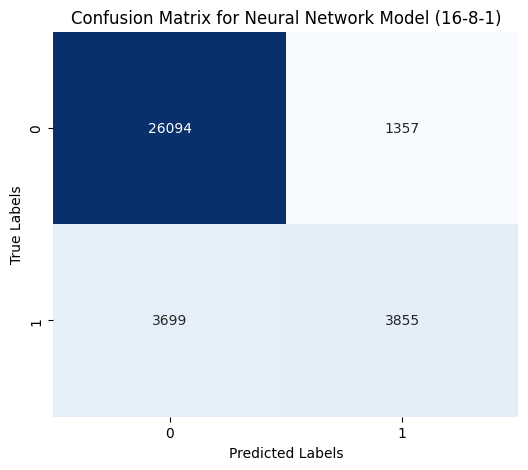

Evaluating Neural Network Model (32-16-8-1)...
Training Accuracy: 0.86
Validation Accuracy: 0.85
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix for Neural Network Model (32-16-8-1):
[[26323  1128]
 [ 3961  3593]]
Accuracy: 0.85
Precision: 0.76
Recall: 0.48
F1-score: 0.59



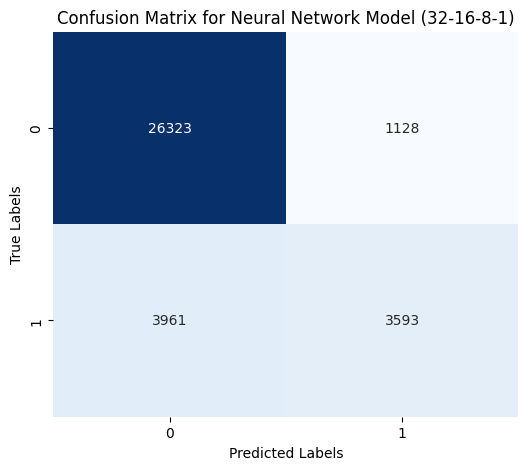

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# List of all the models and their corresponding history objects for easy looping
models = [
    (model, history, "Logistic Regression Model"),
    (model1, history1, "Neural Network Model (2-1)"),
    (model2, history2, "Neural Network Model (4-1)"),
    (model3, history3, "Neural Network Model (8-1)"),
    (model4, history4, "Neural Network Model (16-8-1)"),
    (model5, history5, "Neural Network Model (32-16-8-1)"),
]

# Loop over each model and calculate metrics
for mdl, history_obj, model_name in models:
    print(f"Evaluating {model_name}...")

    # Get training and validation accuracy from history object
    training_accuracy = history_obj.history['accuracy'][-1]  # Take the last epoch value
    validation_accuracy = history_obj.history['val_accuracy'][-1]  # Take the last epoch value

    print(f"Training Accuracy: {training_accuracy:.2f}")
    print(f"Validation Accuracy: {validation_accuracy:.2f}")

    # Get predictions for the validation set
    predictions = mdl.predict(XVALIDATION)
    predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

    # Confusion matrix
    cm = confusion_matrix(YVALIDATION, predictions)

    # Accuracy, precision, recall, F1-score
    accuracy = accuracy_score(YVALIDATION, predictions)
    precision = precision_score(YVALIDATION, predictions)
    recall = recall_score(YVALIDATION, predictions)
    f1score = f1_score(YVALIDATION, predictions)

    # Print metrics
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1score:.2f}\n")

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Phase 4

#Feature Importance and Reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def analyze_feature_importance(X_train_full, y_train_full, X_val_full, y_val_full):
    """
    Analyzes feature importance by training models with one feature at a time,
    ranks features based on validation accuracy, and iteratively removes the least
    important features to evaluate the impact on model performance.

    Parameters:
    - X_train_full: numpy array of shape (n_samples, n_features), training features
    - y_train_full: numpy array of shape (n_samples,), training labels
    - X_val_full: numpy array of shape (n_samples, n_features), validation features
    - y_val_full: numpy array of shape (n_samples,), validation labels
    """
    n_features = X_train_full.shape[1]
    early_stopping = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(filepath = 'my_best_weights.weights.h5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)

    feature_validation_accuracies = []

    for i in range(n_features):
        X_train = X_train_full[:, i : i + 1]
        X_val = X_val_full[:, i : i + 1]

        model = Sequential()
        model.add(Dense(2, activation="relu", input_shape=(1,)))
        model.add(Dense(1, activation="sigmoid"))

        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

        history = model.fit(
            X_train,
            y_train_full,
            epochs=128,
            batch_size=100,
            verbose=0,
            callbacks=[early_stopping, model_checkpoint],
            validation_data=(X_val, y_val_full),
        )

        val_accuracy = history.history["val_accuracy"][-1]
        feature_validation_accuracies.append(val_accuracy)
        print(f"Feature {i}: Validation Accuracy = {val_accuracy:.4f}")

    plt.figure(figsize=(8, 6))
    plt.bar(range(n_features), feature_validation_accuracies)
    plt.xlabel("Feature Index")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy for Each Feature")
    plt.xticks(range(n_features))
    if all(acc > 0.8 for acc in feature_validation_accuracies):
        plt.ylim([0.8, 1.0])
    plt.show()

    feature_importance = sorted(
        zip(range(n_features), feature_validation_accuracies),
        key=lambda x: x[1],
        reverse=True,
    )
    print("\nFeature importance ranking (from most to least important):")
    for idx, acc in feature_importance:
        print(f"Feature {idx}: Validation Accuracy = {acc:.4f}")

    features_ordered = [idx for idx, acc in feature_importance]
    validation_accuracies = []
    removed_features = []

    for i in range(len(features_ordered)):

        features_to_use = features_ordered[: len(features_ordered) - i]
        removed = features_ordered[len(features_ordered) - i :]
        removed_features.append(removed)

        X_train = X_train_full[:, features_to_use]
        X_val = X_val_full[:, features_to_use]

        input_dim = X_train.shape[1]
        model = Sequential()
        model.add(Dense(2, activation="relu", input_shape=(input_dim,)))
        model.add(Dense(1, activation="sigmoid"))

        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

        history = model.fit(
            X_train,
            y_train_full,
            epochs=128,
            batch_size=100,
            verbose=0,
            callbacks=[early_stopping, model_checkpoint],
            validation_data=(X_val, y_val_full),
        )

        val_accuracy = history.history["val_accuracy"][-1]
        validation_accuracies.append(val_accuracy)
        print(
            f"Removed features: {removed} - Validation Accuracy = {val_accuracy:.4f}"
        )

    plt.figure(figsize=(8, 6))
    plt.plot(range(len(validation_accuracies)), validation_accuracies, marker="o")
    plt.xlabel("Number of Removed Features")
    plt.ylabel("Validation Accuracy")
    plt.title("Validation Accuracy After Removing Features")
    plt.xticks(
        range(len(validation_accuracies)),
        [str(removed) for removed in removed_features],
        rotation=45,
    )
    plt.tight_layout()
    plt.show()

    model = Sequential()
    model.add(Dense(2, activation="relu", input_shape=(n_features,)))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    history = model.fit(
        X_train_full,
        y_train_full,
        epochs=128,
        batch_size=100,
        verbose=0,
        callbacks=[early_stopping, model_checkpoint],
        validation_data=(X_val_full, y_val_full),
    )

    val_accuracy_full = history.history["val_accuracy"][-1]
    print(
        f"\nOriginal model with all features - Validation Accuracy = {val_accuracy_full:.4f}"
    )

    best_accuracy = max(validation_accuracies)
    print(f"Best feature-reduced model - Validation Accuracy = {best_accuracy:.4f}")

    difference = val_accuracy_full - best_accuracy
    print(f"Difference in Validation Accuracy: {difference:.4f}")

    # Discussion
    print("\n**Discussion:**")
    print(
        "- **Feature Importance:** Based on the validation accuracies when using each feature individually, the features are ranked from most to least important."
    )
    print(
        "- **Model Performance:** Removing the least important features helps us understand their impact on the model's performance."
    )
    if difference > 0:
        print(
            f"- **Conclusion:** The feature-reduced model performs slightly worse than the original model by {difference:.4f} in validation accuracy."
        )
    elif difference < 0:
        print(
            f"- **Conclusion:** The feature-reduced model performs slightly better than the original model by {-difference:.4f} in validation accuracy."
        )
    else:
        print(
            "- **Conclusion:** The feature-reduced model performs equally well as the original model."
        )


Feature 0: Validation Accuracy = 0.7883
Feature 1: Validation Accuracy = 0.7981
Feature 2: Validation Accuracy = 0.7883
Feature 3: Validation Accuracy = 0.7883
Feature 4: Validation Accuracy = 0.7883
Feature 5: Validation Accuracy = 0.7883
Feature 6: Validation Accuracy = 0.7883
Feature 7: Validation Accuracy = 0.7883


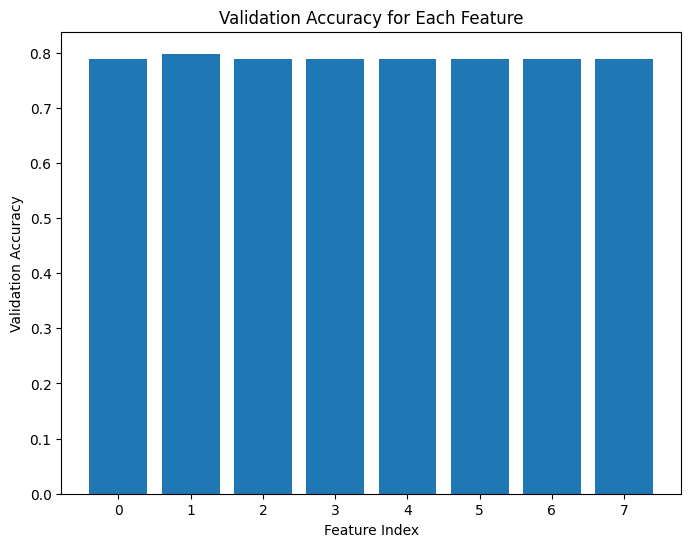


Feature importance ranking (from most to least important):
Feature 1: Validation Accuracy = 0.7981
Feature 0: Validation Accuracy = 0.7883
Feature 2: Validation Accuracy = 0.7883
Feature 3: Validation Accuracy = 0.7883
Feature 4: Validation Accuracy = 0.7883
Feature 5: Validation Accuracy = 0.7883
Feature 6: Validation Accuracy = 0.7883
Feature 7: Validation Accuracy = 0.7883
Removed features: [] - Validation Accuracy = 0.8350
Removed features: [7] - Validation Accuracy = 0.8470
Removed features: [6, 7] - Validation Accuracy = 0.8207
Removed features: [5, 6, 7] - Validation Accuracy = 0.8040
Removed features: [4, 5, 6, 7] - Validation Accuracy = 0.8008
Removed features: [3, 4, 5, 6, 7] - Validation Accuracy = 0.7978
Removed features: [2, 3, 4, 5, 6, 7] - Validation Accuracy = 0.8072
Removed features: [0, 2, 3, 4, 5, 6, 7] - Validation Accuracy = 0.7997


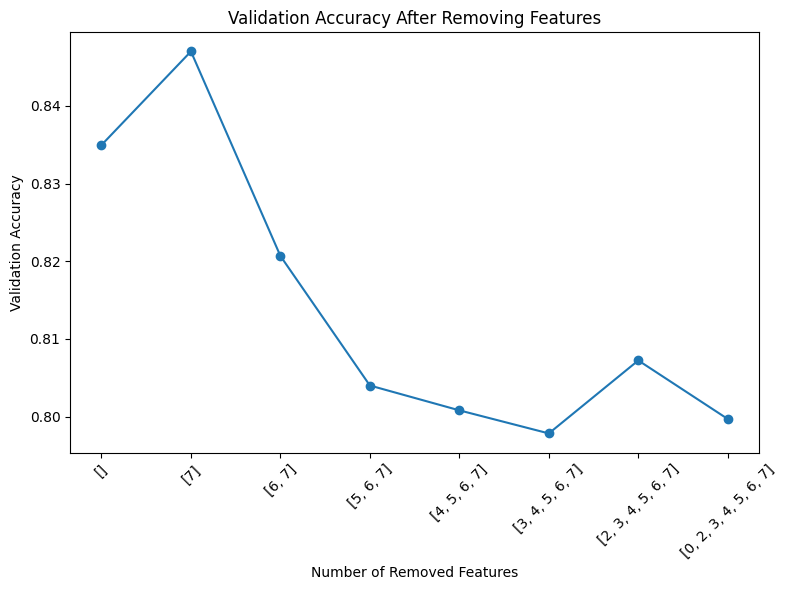

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Original model with all features - Validation Accuracy = 0.8476
Best feature-reduced model - Validation Accuracy = 0.8470
Difference in Validation Accuracy: 0.0005

**Discussion:**
- **Feature Importance:** Based on the validation accuracies when using each feature individually, the features are ranked from most to least important.
- **Model Performance:** Removing the least important features helps us understand their impact on the model's performance.
- **Conclusion:** The feature-reduced model performs slightly worse than the original model by 0.0005 in validation accuracy.


In [ ]:
analyze_feature_importance(XTRAIN, YTRAIN, XVALIDATION, YVALIDATION)